## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white), 60,000 for training and 10,000 for testing.  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a fully connected network, and training it.  Then it will be your turn to implement LeNet-5, try other different models and see if you can improve performance

In [0]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist # easy loading of MNIST
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Let's explore the dataset a little bit

In [0]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train[0].shape

(28, 28)

In [0]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
# What is the corresponding label in the training set?
y_train[333]

8

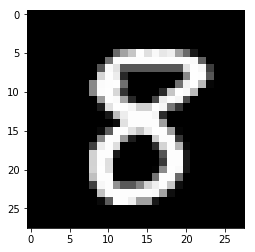

In [0]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [0]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [0]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
fc_x_train = x_train.reshape(len(x_train), 28*28)
fc_x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
fc_x_train = fc_x_train.astype('float32')
fc_x_test = fc_x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
fc_x_train /= 255
fc_x_test /= 255


In [0]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

W0729 12:38:13.802856 140643786016640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 12:38:13.850754 140643786016640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 12:38:13.859931 140643786016640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 12:38:13.882990 140643786016640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0729 12:38:13.894707 

In [0]:
## Note that this model has a LOT of parameters
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

W0729 12:38:39.756381 140643786016640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 12:38:39.770507 140643786016640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history_1 = model_1.fit(
    fc_x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(fc_x_test, y_test)) # this for plotting the loss curve

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.0736 - acc: 0.9798 - val_loss: 0.1406 - val_acc: 0.9751
Epoch 2/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0711 - acc: 0.9812 - val_loss: 0.1452 - val_acc: 0.9752
Epoch 3/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0725 - acc: 0.9802 - val_loss: 0.1361 - val_acc: 0.9749
Epoch 4/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0737 - acc: 0.9799 - val_loss: 0.1390 - val_acc: 0.9751
Epoch 5/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0727 - acc: 0.9797 - val_loss: 0.1402 - val_acc: 0.9740
Epoch 6/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.0694 - acc: 0.9804 - val_loss: 0.1332 - val_acc: 0.9758
Epoch 7/30
60000/60000 [==============================] - 2s 32us/step - loss: 0.0728 - acc: 0.9804 - val_loss: 0.1501 - val_acc

In [0]:
## We will use Keras evaluate function to evaluate performance on the test set

score_1 = model_1.evaluate(fc_x_test, y_test, verbose=0)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

Test loss: 0.15198937854542363
Test accuracy: 0.9753


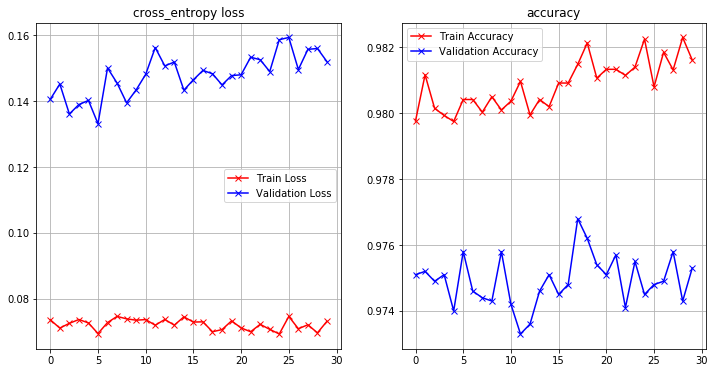

In [0]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history_1)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [0]:
### Build your model here
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

batch_size = 128
epochs = 20
learning_rate = .001


model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr = learning_rate),
              metrics=['accuracy'])

history_2 = model_2.fit(fc_x_train, y_train, # this is still a FC net
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(fc_x_test, y_test))
score_2 = model_2.evaluate(fc_x_test, y_test, verbose=0)
print('')
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 300)               120300    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3010      
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.3292

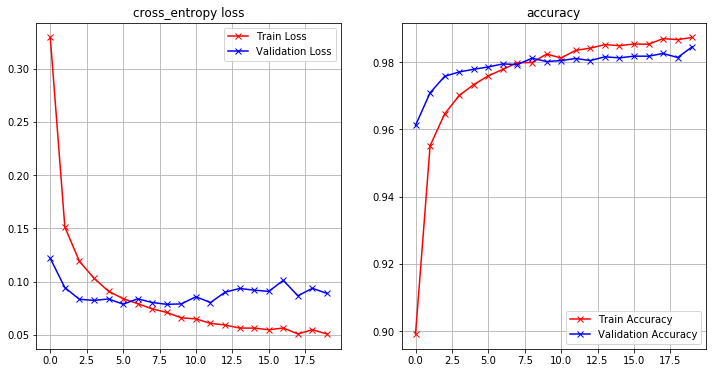

In [0]:
plot_loss_accuracy(history_2)

### Your Turn: Build your own model
Implement LeNet-5 in `model_3`.

How many parameters does your model have?  How does it compare with the previous model?

In [0]:
### Build your model here
from keras.layers import Conv2D, AveragePooling2D, Flatten

model_3 = keras.Sequential()

model_3.add(Conv2D(filters=6, kernel_size=(5, 5), strides = 1, activation='relu', input_shape=(32,32,1)))
model_3.add(AveragePooling2D(pool_size = 2, strides = 2))

model_3.add(Conv2D(filters=16, kernel_size=(5, 5), strides = 1, activation='relu', input_shape = (14,14,6)))
model_3.add(AveragePooling2D(pool_size = 2, strides = 2))

model_3.add(Flatten())

model_3.add(Dense(units=120, activation='relu'))

model_3.add(Dense(units=84, activation='relu'))

model_3.add(Dense(units=10, activation = 'softmax'))

model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_14 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_26 (Dense)             (None, 84)                10164     
__________

(60000, 32, 32, 1) train samples
(10000, 32, 32, 1) test samples


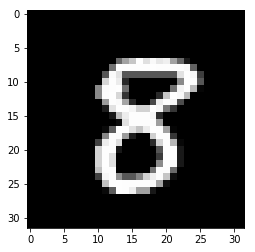

In [0]:
## prepare the images
# Conv2D accept input of the form (batch, rows, cols, channels) -> we need to add a new column to x_train and x_test
# See https://keras.io/layers/convolutional/ for more details
#Reshape the training and test set
ln_x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # <- the reshape is necessary as Conv2D layer takes as input examples that are a matrix with a cell for each pixel and each pixel is an array 
ln_x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)    #    containing information about each channel of the image. So, wih length 1 for greyscale, 3 for RGB, 4 for CMYK, etc.

#Padding the images by 2 pixels since in the paper input images were 32x32
ln_x_train = np.pad(ln_x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
#                             padding at the beginning and end of the first dimension -> 60000
#                                   padding for the second dimension (we are here in the matrix) -> 2 pixels at the beginning and at the end of each row
#                                          padding for the second dimension (we are here in the matrix) -> 2 pixels at the beginning and at the end of each column
#                                                   padding for the number of channel
ln_x_test = np.pad(ln_x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

## Keras works with floats, so we must cast the numbers to floats
ln_x_train = ln_x_train.astype('float32')
ln_x_test = ln_x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
ln_x_train /= 255
ln_x_test /= 255

# this is the shape of the np.array ln_x_train
# it is 3 dimensional.
print(ln_x_train.shape, 'train samples')
print(ln_x_test.shape, 'test samples')

#Visualizing the data
plt.imshow(ln_x_train[333,:,:,0], cmap='Greys_r')

In [0]:
model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',  # use of Adam here
              metrics=['accuracy'])

In [0]:
batch_size = 128
epochs = 10


history_3 = model_3.fit(ln_x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(ln_x_test, y_test))

score_3 = model_3.evaluate(ln_x_test, y_test, verbose=0)
print('')
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 571us/step - loss: 0.0061 - acc: 0.9980 - val_loss: 0.0406 - val_acc: 0.9893
Epoch 2/10
60000/60000 [==============================] - 34s 569us/step - loss: 0.0044 - acc: 0.9987 - val_loss: 0.0382 - val_acc: 0.9901
Epoch 3/10
60000/60000 [==============================] - 34s 571us/step - loss: 0.0049 - acc: 0.9983 - val_loss: 0.0695 - val_acc: 0.9859
Epoch 4/10
60000/60000 [==============================] - 35s 575us/step - loss: 0.0055 - acc: 0.9984 - val_loss: 0.0382 - val_acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 35s 576us/step - loss: 0.0045 - acc: 0.9987 - val_loss: 0.0370 - val_acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 34s 573us/step - loss: 0.0047 - acc: 0.9984 - val_loss: 0.0405 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 34s 571us/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.

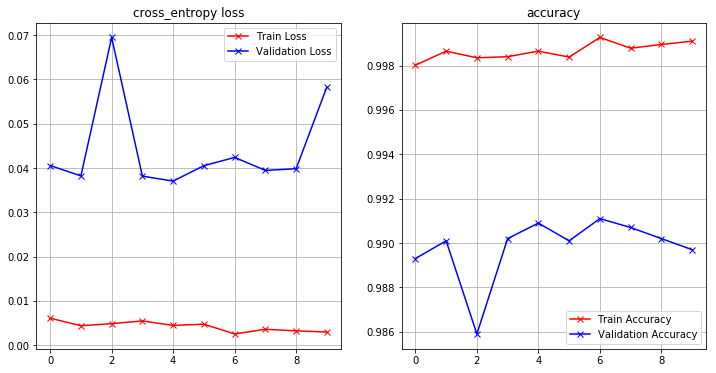

In [0]:
plot_loss_accuracy(history_3)

## SOLUTION

## Think about the following questions

1) How do `model_1`, `model_2` and `model_3` compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?